# 1.데이터 불러오기

+ 데이터 분석과 모델링에 필요한 라이브러리를 불러옵니다.
+ 설치가 안되있는 라이브러리는 설치합니다

In [1]:
import numpy as np

In [6]:
import pandas as pd

In [11]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt

In [16]:
df = sns.load_dataset('titanic')

# 2.데이터 분석하기

+ 데이터의 기본 정보를 확인합니다

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [19]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


info()를 통해 'age', 'deck', 'embarked', 'embark_town' 열에 결측치가 있는 것을 확인할 수 있습니다. describe()를 통해서는 수치형 데이터의 분포를 파악할 수 있습니다.

plot을 통해 데이터를 탐색합니다.

+ 성별에 따른 생존률: 성별이 생존에 영향을 미쳤는지 확인합니다.

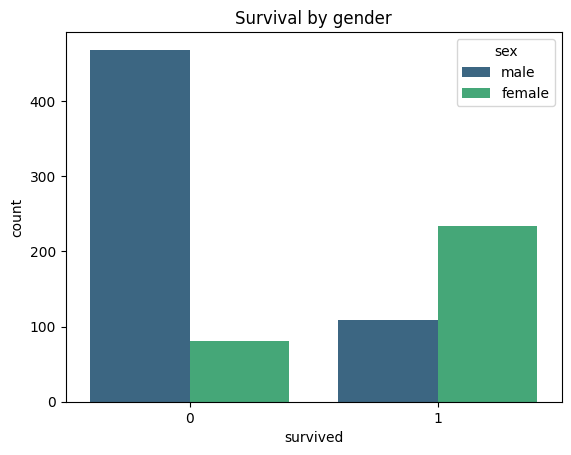

In [21]:
sns.countplot(x='survived', hue='sex', data=df, palette='viridis')
plt.title('Survival by gender')
plt.show()

+ 나이분포: 승객들의 나이분포를 histplot를 사용하여 확인합니다.

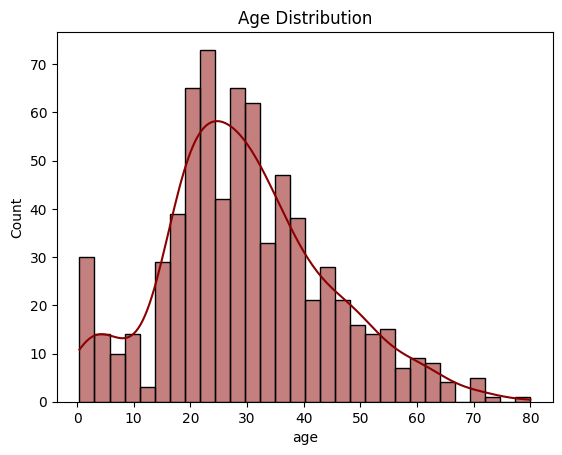

In [22]:
sns.histplot(df['age'].dropna(), kde=True, bins=30, color='darkred')
plt.title('Age Distribution')
plt.show()

# 3.데이터 전처리

In [43]:
#결측치 처리
+ Age (나이): 나이의 결측치는 전체 데이터의 평균 나이로 채우겠습니다.

df['age'] = df['age'].fillna(df['age'].mean())

+ Deck (객실): 'deck' 열은 결측치가 너무 많아 예측에 사용하기 어렵다고 판단하여 제거합니다.

df.drop('deck', axis=1, inplace=True)

+ Embarked & Embark Town (탑승 항구): 이 두 열은 소수의 결측치를 가지며, 최빈값(가장 자주 나타나는 값)으로 채웁니다.

df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(titanic['embark_town'].mode()[0])

SyntaxError: illegal target for annotation (3170106914.py, line 2)

# 4. 모델 훈련 및 평가

전처리를 마친 데이터를 사용하여 회귀모델을 훈련시키고 성능을 평가합니다.

훈련 데이터와 테스트 데이터를 7:3 비율로 나눕니다

In [38]:
# 독립 변수(X)와 종속 변수(y) 설정
X = df.drop('survived', axis=1)
y = df['survived']

# 훈련 데이터와 테스트 데이터 분리 (70% 훈련, 30% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

NameError: name 'train_test_split' is not defined

회귀모델 훈련

In [39]:
# 로지스틱 회귀 모델 객체 생성
logmodel = LogisticRegression(solver='liblinear')

# 모델 훈련
logmodel.fit(X_train, y_train)

NameError: name 'LogisticRegression' is not defined